In [134]:
import pandas as pd
import numpy as np

In [135]:
def get_samples_dictionary(file_path):
    
    sample_dictionary = {}
    
    with open(file_path, 'r') as file:
        
        ref_name = file_path.split('/')[-1].replace('_longisoforms_CDS_200plus.stats','')
        
        for line in file:
            if line.startswith('#= Summary for dataset:'):
                
                sample_name = line.split('/')[-1].split('_longisoforms_CDS_200plus')[0]
                comparison_name = f'{ref_name}_vs_{sample_name}'
                sample_dictionary[comparison_name] = []

                for _ in range(18):
                    sample_dictionary[comparison_name].append(file.readline().strip())
    
    return sample_dictionary
                    

In [149]:
def parse_single_comparison(lines_list):
    
    res_dict = {}
    
    for line in lines_list:
        
        
        if "#     Query mRNAs :" in line:
            query_mrnas = line.split(':')[1].split('in')[0].strip()
            res_dict['query_mrnas'] = int(query_mrnas)
        
        if "# Reference mRNAs :" in line:
            reference_mrnas = line.split(':')[1].split('in')[0].strip()
            res_dict['reference_mrnas'] = int(reference_mrnas)
        
        if "Base level" in line:
            base_level_Se = line.split(':')[-1].split('|')[0].strip()
            res_dict['base_level_Se'] = float(base_level_Se)         
            base_level_Pr = line.split(':')[-1].split('|')[1].strip()
            res_dict['base_level_Pr'] = float(base_level_Pr)
            
        if "Exon level" in line:
            exon_level_Se = line.split(':')[-1].split('|')[0].strip()
            res_dict['exon_level_Se'] = float(exon_level_Se)         
            exon_level_Pr = line.split(':')[-1].split('|')[1].strip()
            res_dict['exon_level_Pr'] = float(exon_level_Pr)
            
        if "Transcript level" in line:
            transcript_level_Se = line.split(':')[-1].split('|')[0].strip()
            res_dict['transcript_level_Se'] = float(transcript_level_Se)         
            transcript_level_Pr = line.split(':')[-1].split('|')[1].strip()
            res_dict['transcript_level_Pr'] = float(transcript_level_Pr)
            
        if "Locus level" in line:
            locus_level_Se = line.split(':')[-1].split('|')[0].strip()
            res_dict['locus_level_Se'] = float(locus_level_Se)         
            locus_level_Pr = line.split(':')[-1].split('|')[1].strip()
            res_dict['locus_level_Pr'] = float(locus_level_Pr)
            
        if "Matching intron chains" in line:
            matching_intron_chains = line.split(':')[-1].strip()
            res_dict['matching_intron_chains'] = int(matching_intron_chains)
            
        if "Matching transcripts" in line:
            matching_transcripts = line.split(':')[-1].strip()
            res_dict['matching_transcripts'] = int(matching_transcripts)
        
        if "Matching loci" in line:
            matching_loci = line.split(':')[-1].strip()
            res_dict['matching_loci'] = int(matching_loci)
            
        if "Missed exons" in line:
            missed_exon_prop = line.split(':')[-1].split('\t')[0].strip()
            res_dict['missed_exon_prop'] = missed_exon_prop
            missed_exon_perc = line.split(':')[-1].split('\t')[-1].strip('( ').strip('%)')
            res_dict['missed_exon_perc'] = float(missed_exon_perc)
            
        if "Novel exons" in line:
            novel_exon_prop = line.split(':')[-1].split('\t')[0].strip()
            res_dict['novel_exon_prop'] = novel_exon_prop
            novel_exon_perc = line.split(':')[-1].split('\t')[-1].strip('( ').strip('%)')
            res_dict['novel_exon_perc'] = float(novel_exon_perc)
            
        if "Missed loci" in line:
            missed_loci_prop = line.split(':')[-1].split('\t')[0].strip()
            res_dict['missed_loci_prop'] = missed_loci_prop
            missed_loci_perc = line.split(':')[-1].split('\t')[-1].strip('( ').strip('%)')
            res_dict['missed_loci_perc'] = float(missed_loci_perc)
            
        if "Novel loci" in line:
            novel_loci_prop = line.split(':')[-1].split('\t')[0].strip()
            res_dict['novel_loci_prop'] = novel_loci_prop
            novel_loci_perc = line.split(':')[-1].split('\t')[-1].strip('( ').strip('%)')
            res_dict['novel_loci_perc'] = float(novel_loci_perc)
            

    return res_dict
        

In [150]:
def combine_gffcompare_res(gffcompare_stats_list):
    
    df = pd.DataFrame()
    
    for f in gffcompare_stats_list:
        
        sample_name = f.split('/')[-1].replace('_longisoforms_CDS_200plus.stats','')
        
        samples_dict = get_samples_dictionary(f)
        
        column_to_add = pd.DataFrame()
        
        for comparison in samples_dict:
            
            comparison_dict = parse_single_comparison(samples_dict[comparison])
            i =1 
            if i==1:
                print (samples_dict[comparison])
                i = 2 
            comparison_dict = {f'{comparison}_{k}':v for k,v in comparison_dict.items()}
            comparison_df = pd.DataFrame.from_dict(comparison_dict, orient='index')
            column_to_add = column_to_add.append(comparison_df)
            
        column_to_add = column_to_add.rename({0:sample_name}, axis='columns')
        
        df = pd.concat([df, column_to_add], axis=1)

    return df
   

In [151]:
a = ! realpath ../out/hh/gffcompare_stats/*

In [152]:
large_res = combine_gffcompare_res(a)

['#     Query mRNAs :   13941 in   13941 loci  (12870 multi-exon transcripts)', '#            (0 multi-transcript loci, ~1.0 transcripts per locus)', '# Reference mRNAs :   11933 in   11933 loci  (11017 multi-exon)', '# Super-loci w/ reference transcripts:     7103', '#-----------------| Sensitivity | Precision  |', 'Base level:    53.0     |    61.3    |', 'Exon level:    26.8     |    38.9    |', 'Intron level:    24.9     |    40.2    |', 'Intron chain level:     1.4     |     1.2    |', 'Transcript level:     2.1     |     1.8    |', 'Locus level:     2.1     |     1.8    |', '', 'Matching intron chains:     154', 'Matching transcripts:     249', 'Matching loci:     249', '', 'Missed exons:   51738/94908\t( 54.5%)', 'Novel exons:   22352/65316\t( 34.2%)']
['#     Query mRNAs :   15496 in   15496 loci  (13585 multi-exon transcripts)', '#            (0 multi-transcript loci, ~1.0 transcripts per locus)', '# Reference mRNAs :   11933 in   11933 loci  (11017 multi-exon)', '# Super-loci

In [153]:
samples_dict[comparison]

NameError: name 'samples_dict' is not defined

In [67]:
def get_matrix(large_df, metric):
    
    samples = list(large_df.columns)
    res_df = pd.DataFrame(index=samples, columns=samples)
    
    for sample in samples:        
        for i in range(len(samples)):
            interesting_row = f'{sample}_vs_{samples[i]}_{metric}'
            val = large_df.loc[interesting_row,sample]
            res_df.loc[sample, samples[i]] = val
            res_df = res_df[res_df.columns].astype(float)
    
    return res_df

In [68]:
get_matrix(large_res, 'base_level_Se')

,geneid_Leishmania_major,geneidx_Leishmania_major,helixer_Leishmania_major,LmjFc_cbm_v1_CDS
geneid_Leishmania_major,100.0,29.3,81.6,94.0
geneidx_Leishmania_major,99.7,100.0,96.9,99.1
helixer_Leishmania_major,99.2,34.6,100.0,97.6
LmjFc_cbm_v1_CDS,98.6,30.5,84.2,100.0


In [71]:
axs[i,j]

<AxesSubplot:>

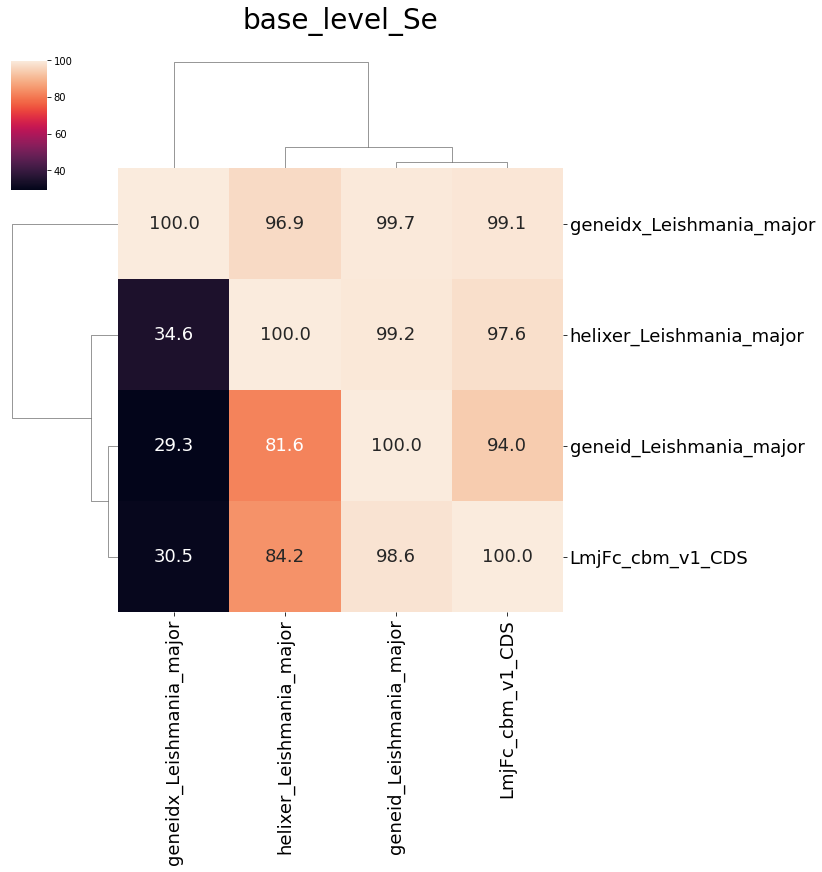

In [133]:
print_heatmap(get_matrix(large_res, 'base_level_Se'),  'base_level_Se')

In [132]:
def print_heatmap(matrix, metric):

    g = sns.clustermap(matrix,
                   annot=True,
                   fmt=".1f",
                   annot_kws={"size": 18}
                   )

    g.ax_heatmap.tick_params(labelsize=18)
    g.ax_heatmap.set_title(metric, size = 28, y = 1.3)
    g.savefig(f"{metric}.png") 


In [117]:
g.ax_heatmap.tick_params(labelsize=22)

In [121]:
g

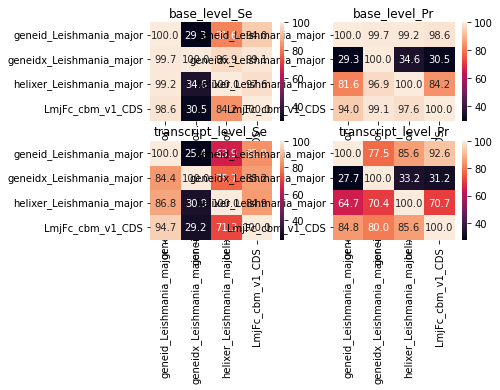

In [82]:
fig, axs = plt.subplots(2, 2)

coords = list(product(range(2),range(2)))

for coord, metric in zip(coords, ['base_level_Se',
              'base_level_Pr',
              'transcript_level_Se',
              'transcript_level_Pr']):
    i, j = coord
    metric_matrix = get_matrix(large_res, metric)
    axs[i,j].title.set_text(metric)
    sns.heatmap(metric_matrix,annot=True, fmt=".1f", ax = axs[i,j])

In [15]:
m = get_matrix(large_res, 'base_level_Pr')

In [24]:
import seaborn as sns
from itertools import permutations

In [41]:
all_permutations = list(product(range(2),range(2)))

In [42]:
all_permutations

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [36]:
from itertools import product

list1 = [1, 2]
list2 = ['a', 'b']

# Get all permutations of the elements of the two lists
all_permutations = list(product(list1, list2))

# Print the result
for perm in all_permutations:
    print(perm)


(1, 'a')
(1, 'b')
(2, 'a')
(2, 'b')


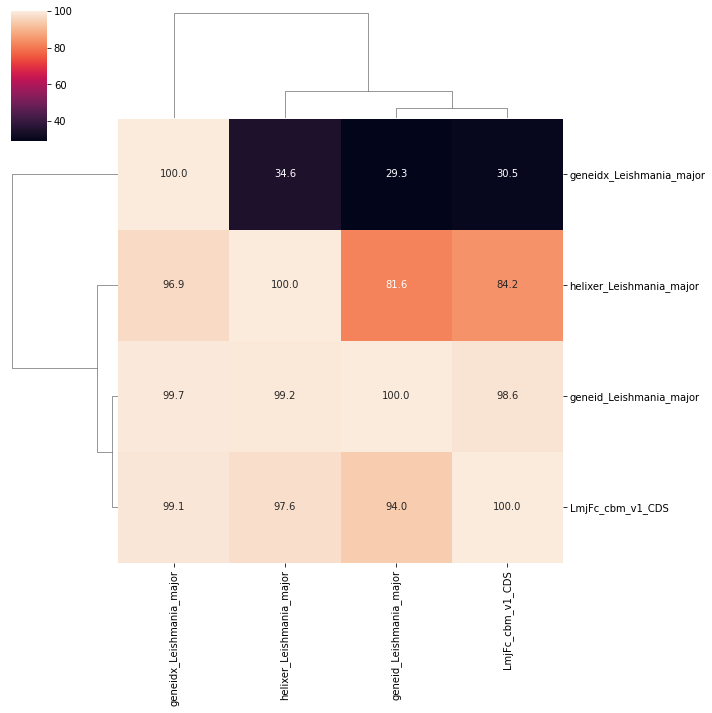

In [23]:
sns.clustermap(m[m.columns].astype(float),annot=True, fmt=".1f")

In [20]:
m[m.columns].astype(float)

,geneid_Leishmania_major,geneidx_Leishmania_major,helixer_Leishmania_major,LmjFc_cbm_v1_CDS
geneid_Leishmania_major,100.0,99.7,99.2,98.6
geneidx_Leishmania_major,29.3,100.0,34.6,30.5
helixer_Leishmania_major,81.6,96.9,100.0,84.2
LmjFc_cbm_v1_CDS,94.0,99.1,97.6,100.0


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))


for i in range(2):
    for j in range(2):
        
        sns.clustermap(m[m.columns].astype(float),annot=True, fmt=".1f" ax = [i,j])
        
        axs[i, j].plot(x, [y1, y2, y3, y4][i * 2 + j])
        axs[i, j].set_title(plot_titles[i * 2 + j])

In [47]:
from matplotlib import pyplot as plt

TypeError: heatmap() got multiple values for keyword argument 'ax'

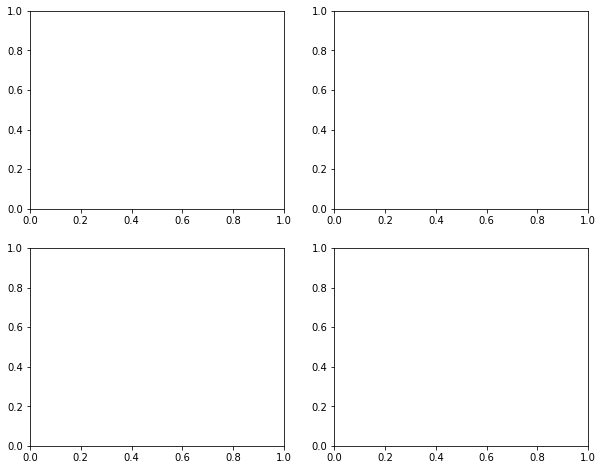

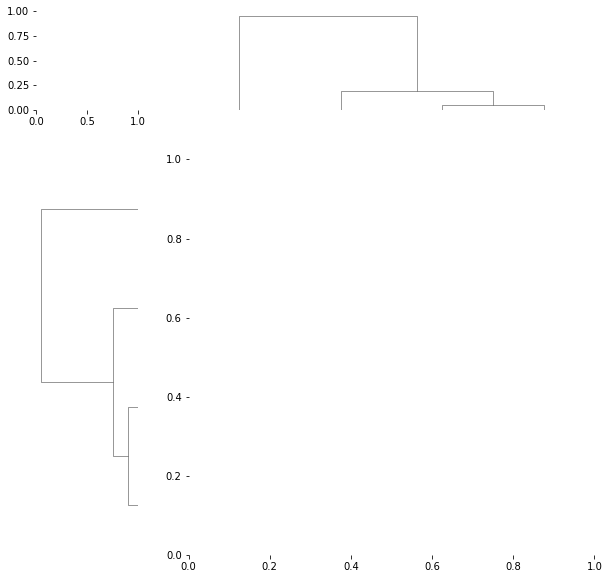

In [69]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

coords = list(product(range(2),range(2)))

for coord, metric in zip(coords, ['base_level_Se',
              'base_level_Pr',
              'transcript_level_Se',
              'transcript_level_Pr']):
    i, j = coord 
    metrix_matrix = get_matrix(large_res, metric)
    sns.clustermap(metrix_matrix,annot=True, fmt=".1f", ax = axs[i,j] )




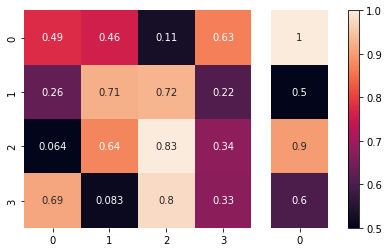

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(np.random.random((4,4)))
df2 = pd.DataFrame([1., .5, .9, .6])

vmin = min(df.values.min(), df2.values.min())
vmax = max(df.values.max(), df2.values.max())

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[4,1,0.2]))

sns.heatmap(df, annot=True, cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

In [63]:
axs[1]

<AxesSubplot:>

In [64]:
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)